# <h1> **MODELO DE INTELIGENCIA ARTIFICIAL PARA DETERMINACIÓN DE PRODUCCIÓN FINAL DE ORO PARA LA EMPRESA ZYFRA** </h1>



## **DESCRIPCIÓN DEL PROYECTO**

Se buscar preparar un prototipo de un modelo de machine learning para Zyfra. 

La empresa desarrolla soluciones de eficiencia para la industria pesada.


El modelo debe predecir la cantidad de oro extraído del mineral de oro. 
Dispones de los datos de extracción y purificación.


El modelo ayudará a optimizar la producción y a eliminar los parámetros no rentables.

El mineral extraído se somete a un tratamiento primario para obtener la mezcla de mineral, o alimentación rougher, que es la materia prima utilizada para la flotación (también conocida como proceso rougher). Después de la flotación, el material se somete al proceso de purificación en dos etapas.

Veamos el proceso paso a paso:
1. ** Flotación**

La mezcla de mineral de oro se introduce en las plantas de flotación para obtener un concentrado de oro rougher y colas rougher (es decir, residuos del producto con una baja concentración de metales valiosos).
La estabilidad de este proceso se ve afectada por la volatilidad y el estado físico-químico desfavorable de la pulpa de flotación (una mezcla de partículas sólidas y líquido).

2. **Purificación**
El concentrado rougher se somete a dos etapas de purificación. Luego de esto, tenemos el concentrado final y las nuevas colas.

**Descripción de datos**

Proceso tecnológico
* Rougher feed — materia prima
* Rougher additions (o adiciones de reactivos) - reactivos de flotación: xantato, sulfato, depresante
 * Xantato — promotor o activador de la flotación
 * Sulfato — sulfuro de sodio para este proceso en particular
 * Depresante — silicato de sodio
* Rougher process — flotación
* Rougher tails — residuos del producto
* Float banks — instalación de flotación
* Cleaner process — purificación
* Rougher Au — concentrado de oro rougher
* Final Au — concentrado de oro final

Parámetros de las etapas

* air amount — volumen de aire
* fluid levels
* feed size — tamaño de las partículas de la alimentación
* feed rate

Denominación de las características

Así es como se denominan las características:

[stage].[parameter_type].[parameter_name]

Ejemplo: rougher.input.feed_ag

Valores posibles para [stage]:

* rougher — flotación
* primary_cleaner — purificación primaria
* secondary_cleaner — purificación secundaria
* final — características finales

Valores posibles para [parameter_type]:
* input — parámetros de la materia prima
* output — parámetros del producto
* state — parámetros que caracterizan el estado actual de la etapa
* calculation — características de cálculo

## **LIBRERÍAS**

In [1]:
import pandas as pd
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
import copy
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
import numpy as np

## **VISUALIZACIÓN DE LOS DATOS** 

Primeramente se importan los 3 dataFrames:

`gold_full` - Data frame que contiene toda la información de la base de datos completa

`gold_test` -  Conjunto de prueba para el modelo de inteligencia artificial 

`gold_train` - Conjunto de entrenamiento para el modelo de inteligencia artificial 

In [2]:
try: 
  gold_full = pd.read_csv('/content/drive/MyDrive/practicum/Proyecto integrado 2/gold_recovery_full.csv')
  gold_test = pd.read_csv('/content/drive/MyDrive/practicum/Proyecto integrado 2/gold_recovery_test.csv')
  gold_train = pd.read_csv('/content/drive/MyDrive/practicum/Proyecto integrado 2/gold_recovery_train.csv')
except:
  gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')
  gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
  gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')  

Se procede a mostrar las cinco primeras columnas de cada Data Frame, así como su información y la descripción de los datos

In [3]:
gold_full.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [4]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                22716 non-null  object 
 1   final.output.concentrate_ag                         22627 non-null  float64
 2   final.output.concentrate_pb                         22629 non-null  float64
 3   final.output.concentrate_sol                        22331 non-null  float64
 4   final.output.concentrate_au                         22630 non-null  float64
 5   final.output.recovery                               20753 non-null  float64
 6   final.output.tail_ag                                22633 non-null  float64
 7   final.output.tail_pb                                22516 non-null  float64
 8   final.output.tail_sol                               22445 non-null  float64


Como se observa, todos las características tienen el mismo tipo de dato

In [5]:
gold_full.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,22627.000000,22629.000000,22331.000000,22630.000000,20753.000000,22633.000000,22516.000000,22445.000000,22635.000000,21107.000000,...,22571.000000,22587.000000,22608.000000,22607.000000,22615.000000,22615.000000,22615.000000,22616.000000,22597.000000,22615.000000
mean,4.781559,9.095308,8.640317,40.001172,67.447488,8.923690,2.488252,9.523632,2.827459,140.277672,...,18.205125,-499.878977,14.356474,-476.532613,14.883276,-503.323288,11.626743,-500.521502,17.976810,-519.361465
std,2.030128,3.230797,3.785035,13.398062,11.616034,3.517917,1.189407,4.079739,1.262834,49.919004,...,6.560700,80.273964,5.655791,93.822791,6.372811,72.925589,5.757449,78.956292,6.636203,75.477151
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.836914,-0.423260,-799.741097,0.427084,-800.258209,-0.079426,-810.473526
25%,4.018525,8.750171,7.116799,42.383721,63.282393,7.684016,1.805376,8.143576,2.303108,110.177081,...,14.095940,-500.896232,10.882675,-500.309169,10.941299,-500.628697,8.037533,-500.167897,13.968418,-500.981671
50%,4.953729,9.914519,8.908792,44.653436,68.322258,9.484369,2.653001,10.212998,2.913794,141.330501,...,18.007326,-499.917108,14.947646,-499.612292,14.859117,-499.865158,10.989756,-499.951980,18.004215,-500.095463
75%,5.862593,10.929839,10.705824,46.111999,72.950836,11.084557,3.287790,11.860824,3.555077,174.049914,...,22.998194,-498.361545,17.977502,-400.224147,18.014914,-498.489381,14.001193,-499.492354,23.009704,-499.526388
max,16.001945,17.031899,19.615720,53.611374,100.000000,19.552149,6.086532,22.861749,9.789625,274.409626,...,60.000000,-127.692333,31.269706,-6.506986,63.116298,-244.483566,39.846228,-120.190931,54.876806,-29.093593


In [6]:
gold_test.head()

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333


In [7]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5856 non-null   object 
 1   primary_cleaner.input.sulfate               5554 non-null   float64
 2   primary_cleaner.input.depressant            5572 non-null   float64
 3   primary_cleaner.input.feed_size             5856 non-null   float64
 4   primary_cleaner.input.xanthate              5690 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5840 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5840 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5840 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5840 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5840 non-null   float64
 10  primary_clea

In [8]:
gold_test.describe()

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5554.000000,5572.000000,5856.000000,5690.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,...,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000,5840.000000
mean,170.515243,8.482873,7.264651,1.321420,1481.990241,-509.057796,1486.908670,-511.743956,1468.495216,-509.741212,...,15.636031,-516.266074,13.145702,-476.338907,12.308967,-512.208126,9.470986,-505.017827,16.678722,-512.351694
std,49.608602,3.353105,0.611526,0.693246,310.453166,61.339256,313.224286,67.139074,309.980748,62.671873,...,4.660835,62.756748,4.304086,105.549424,3.762827,58.864651,3.312471,68.785898,5.404514,69.919839
min,0.000103,0.000031,5.650000,0.000003,0.000000,-799.773788,0.000000,-800.029078,0.000000,-799.995127,...,0.000000,-799.798523,0.000000,-800.836914,-0.223393,-799.661076,0.528083,-800.220337,-0.079426,-809.859706
25%,143.340022,6.411500,6.885625,0.888769,1497.190681,-500.455211,1497.150234,-500.936639,1437.050321,-501.300441,...,12.057838,-501.054741,11.880119,-500.419113,10.123459,-500.879383,7.991208,-500.223089,13.012422,-500.833821
50%,176.103893,8.023252,7.259333,1.183362,1554.659783,-499.997402,1553.268084,-500.066588,1546.160672,-500.079537,...,17.001867,-500.160145,14.952102,-499.644328,12.062877,-500.047621,9.980774,-500.001338,16.007242,-500.041085
75%,207.240761,10.017725,7.650000,1.763797,1601.681656,-499.575313,1601.784707,-499.323361,1600.785573,-499.009545,...,18.030985,-499.441529,15.940011,-401.523664,15.017881,-499.297033,11.992176,-499.722835,21.009076,-499.395621
max,274.409626,40.024582,15.500000,5.433169,2212.432090,-57.195404,1975.147923,-142.527229,1715.053773,-150.937035,...,30.051797,-401.565212,31.269706,-6.506986,25.258848,-244.483566,14.090194,-126.463446,26.705889,-29.093593


In [9]:
gold_train.head()

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691


In [10]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                16860 non-null  object 
 1   final.output.concentrate_ag                         16788 non-null  float64
 2   final.output.concentrate_pb                         16788 non-null  float64
 3   final.output.concentrate_sol                        16490 non-null  float64
 4   final.output.concentrate_au                         16789 non-null  float64
 5   final.output.recovery                               15339 non-null  float64
 6   final.output.tail_ag                                16794 non-null  float64
 7   final.output.tail_pb                                16677 non-null  float64
 8   final.output.tail_sol                               16715 non-null  float64


In [11]:
gold_train.describe()

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,16788.000000,16788.000000,16490.000000,16789.000000,15339.000000,16794.000000,16677.000000,16715.000000,16794.000000,15553.000000,...,16731.000000,16747.000000,16768.000000,16767.000000,16775.000000,16775.000000,16775.000000,16776.000000,16757.000000,16775.000000
mean,4.716907,9.113559,8.301123,39.467217,67.213166,8.757048,2.360327,9.303932,2.687512,129.479789,...,19.101874,-494.164481,14.778164,-476.600082,15.779488,-500.230146,12.377241,-498.956257,18.429208,-521.801826
std,2.096718,3.389495,3.825760,13.917227,11.960446,3.634103,1.215576,4.263208,1.272757,45.386931,...,6.883163,84.803334,5.999149,89.381172,6.834703,76.983542,6.219989,82.146207,6.958294,77.170888
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000003,...,0.000000,-799.920713,0.000000,-800.021781,-0.423260,-799.741097,0.427084,-800.258209,0.024270,-810.473526
25%,3.971262,8.825748,6.939185,42.055722,62.625685,7.610544,1.641604,7.870275,2.172953,103.064021,...,14.508299,-500.837689,10.741388,-500.269182,10.977713,-500.530594,8.925586,-500.147603,13.977626,-501.080595
50%,4.869346,10.065316,8.557228,44.498874,67.644601,9.220393,2.453690,10.021968,2.781132,131.783108,...,19.986958,-499.778379,14.943933,-499.593286,15.998340,-499.784231,11.092839,-499.933330,18.034960,-500.109898
75%,5.821176,11.054809,10.289741,45.976222,72.824595,10.971110,3.192404,11.648573,3.416936,159.539839,...,24.983961,-494.648754,20.023751,-400.137948,20.000701,-496.531781,15.979467,-498.418000,24.984992,-499.565540
max,16.001945,17.031899,18.124851,53.611374,100.000000,19.552149,6.086532,22.317730,9.789625,251.999948,...,60.000000,-127.692333,28.003828,-71.472472,63.116298,-275.073125,39.846228,-120.190931,54.876806,-39.784927


### **CONCLUSIÓN INTERMEDIA**



Se observan 3 dataframe, cada uno con un número difernte de columnas, donde tanto el data Frame de full como el de entrenamiento poseen 87 columnas diferentes y el de prueba solo 52, lo que indica que existen 34 columnas que a priori el cliente quiere que determienmos por meido del modelo, aunque el alcance actual se limita a solo dos de ellas. 

## **COMPROBACIÓN DE VALORES** 

En primera instancia, es importante corroborar que los valores que se enceuntran en el dataframe de `rougher.output.recovery` coincidan, con el cálculo teórico o que la menos la diferencia entre ambos valores sea razonable, con distribuciones de los datos similares, ya que como bien se sabe, los valores teóricos comunmente se alejan de los reales

Para ello se crea la función `rougher_output` la cual permite realizar dicho cálculo

In [12]:
def rougher_output(rouger_concentrate_au, final_concentrate_au, rouger_feed_au, rouger_tail_au):

  
  C = rouger_concentrate_au
  F = rouger_feed_au
  T = rouger_tail_au 

  try:
    recup = (C*(F-T))*100/(F*(C-T))
  except:
    recup = 0
  if recup <0:
    recup = 0

  return recup


Sin embargo, primeramente, se debe analizar la presencia de valores atípicos, así como investigar la forma óptima para rellenar los valores ausentes.

In [13]:
gold_train.loc[:,['rougher.output.concentrate_au','final.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']].describe()

,rougher.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
count,16778.000000,16789.000000,16777.000000,14611.000000
mean,17.401541,39.467217,7.170717,1.763930
std,6.921875,13.917227,3.002113,0.731518
min,0.000000,0.000000,0.000000,0.020676
25%,17.443663,42.055722,6.203083,1.311610
50%,19.644663,44.498874,7.443530,1.747907
75%,21.224486,45.976222,8.965193,2.190839
max,28.522811,53.611374,14.093363,9.688980


Se evidencia una presencia de valores ausentes substancial con respecto al resto de caracteristicas en `rougher.output.tail_au` a simple vista se podrían sustituir los valores con la media, son embargo, se procede a analizar los valores atípicos antes de realizar dicha acción.

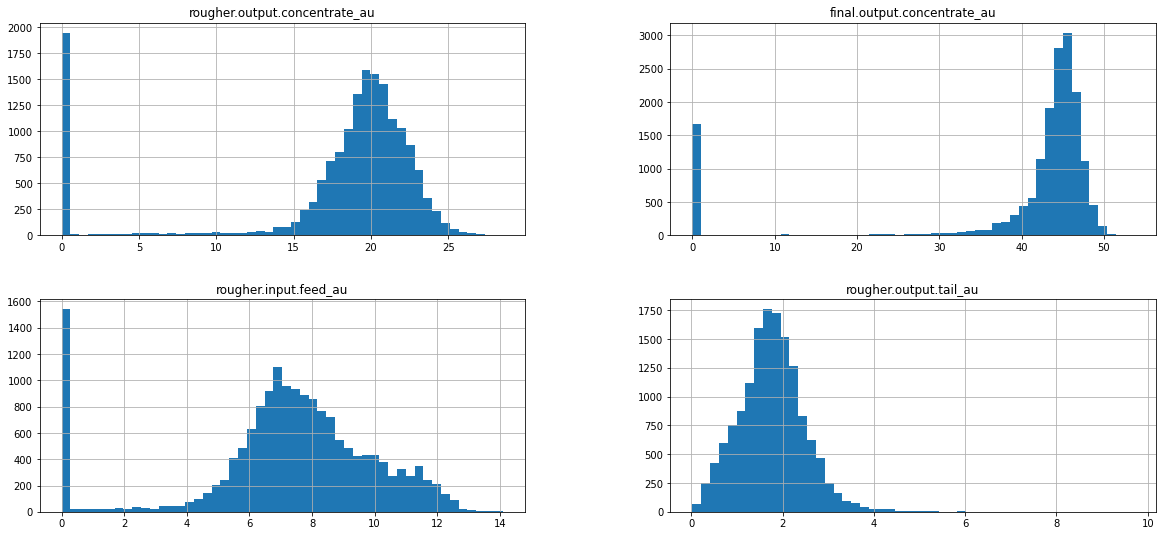

In [14]:
gold_train.loc[:,['rougher.output.concentrate_au','final.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']].hist(bins = 50,figsize=(20, 9))
plt.show()

Se evidencia, una elevada precencia de atípicos en torno al 0 para el caso de las características:

`'rougher.output.concentrate_au'`

`'final.output.concentrate_au'`

`'rougher.input.feed_au`

Y una elevada precia de atípicos en muy superiores a la mediana en:

`'rougher.output.tail_au'`

Para oobservar mejor la distribución de los valores sereliza el gráfico de caja y bigotes correspondiente:

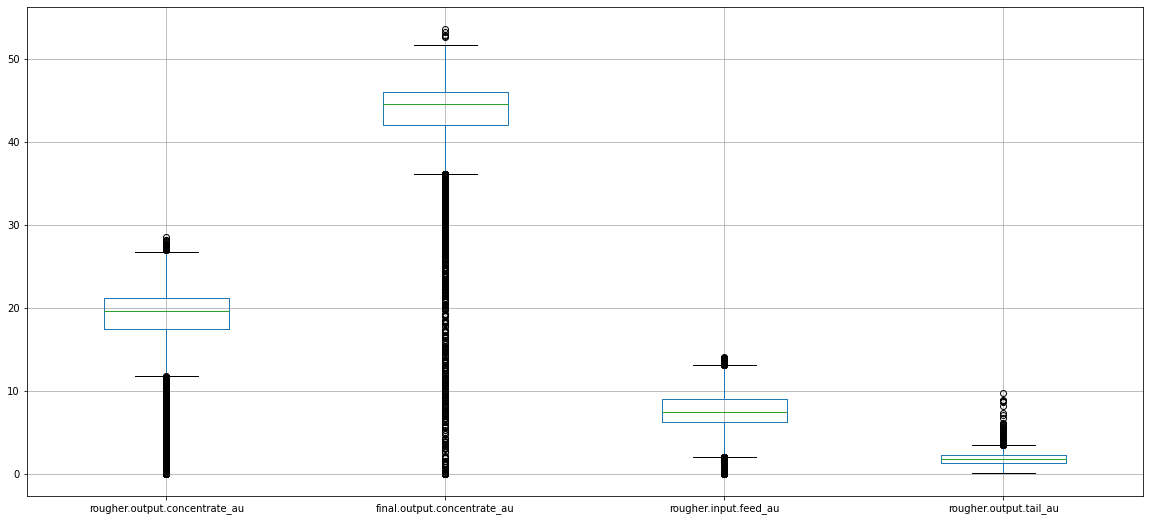

In [15]:
gold_train.loc[:,['rougher.output.concentrate_au','final.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']].boxplot(figsize=(20, 9))
plt.show()

Sin embargo, debido al grn número de columnas, se decide no eliminar los valores, ya que no se puede determinar a ciencia cierta si verdaderamente son atípicos, o si son una caracteristica intrinseca dee este tipo de procesos, ya que como vemos en 4 columnas hay un patrón de la presencia de los mismos.

Se procede entonces a sustituir por la media

In [16]:
gold_train_2 = copy.copy(gold_train)
gold_train_2['rougher.output.concentrate_au']= gold_train_2['rougher.output.concentrate_au'].fillna(gold_train_2['rougher.output.concentrate_au'].mean())
gold_train_2['final.output.concentrate_au'] = gold_train_2['final.output.concentrate_au'].fillna(gold_train_2['final.output.concentrate_au'].mean())
gold_train_2['rougher.input.feed_au'] = gold_train_2['rougher.input.feed_au'].fillna(gold_train_2['rougher.input.feed_au'].mean())
gold_train_2['rougher.output.tail_au'] = gold_train_2['rougher.output.tail_au'].fillna(gold_train_2['rougher.output.tail_au'].mean())

Se corroboran los resultados por medio de la función describe.

In [17]:
gold_train_2.loc[:,['rougher.output.concentrate_au','final.output.concentrate_au', 'rougher.input.feed_au','rougher.output.tail_au']].describe()

,rougher.output.concentrate_au,final.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
count,16860.000000,16860.000000,16860.000000,16860.000000
mean,17.401541,39.467217,7.170717,1.763930
std,6.905021,13.887890,2.994714,0.680980
min,0.000000,0.000000,0.000000,0.020676
25%,17.401541,41.988273,6.209952,1.392400
50%,19.629193,44.483470,7.429003,1.763930
75%,21.218314,45.969495,8.954083,2.107259
max,28.522811,53.611374,14.093363,9.688980


Como se evidnecia, los valores fueron corregidos con exito, ya no hay presencia de ausentes, y los valores de media y mediana aseemejan una distribución bastante normalizada.

A continuación se procede al cáculo

In [18]:
gold_train_2['rougher.output.recovery_calculate'] = list(map(lambda rouger_concentrate_au, final_concentrate_au, rouger_feed_au, rouger_tail_au: 
                                                           rougher_output(rouger_concentrate_au, final_concentrate_au, rouger_feed_au, rouger_tail_au), 
                                                           gold_train_2['rougher.output.concentrate_au'],gold_train_2['final.output.concentrate_au'],
                                                           gold_train_2['rougher.input.feed_au'],  gold_train_2['primary_cleaner.output.tail_au'],))

In [19]:
gold_train_2.loc[:,['rougher.output.recovery','rougher.output.recovery_calculate']]

,rougher.output.recovery,rougher.output.recovery_calculate
0,87.107763,75.562556
1,86.843261,72.146597
2,86.842308,70.666296
3,87.226430,71.385107
4,86.688794,67.833509
...,...,...
16855,89.574376,64.671889
16856,87.724007,56.667361
16857,88.890579,51.106547
16858,89.858126,42.476035


In [20]:
gold_train_2.loc[:,['rougher.output.recovery','rougher.output.recovery_calculate']].describe()

,rougher.output.recovery,rougher.output.recovery_calculate
count,14287.000000,16777.000000
mean,82.394201,92.522399
std,15.096808,4260.914477
min,0.000000,0.000000
25%,79.818372,44.077440
50%,85.235997,63.784316
75%,90.131691,75.542609
max,100.000000,551385.275588


Como se puede evidenciar, los valores son cercanos entre sí. Para determinar el porcentaje de error, se procede a calcular el error medio ansoluto de las distribuciones, luego de rellenar los valores atípicos presentes en la característica de `rougher.output.recovery` por medio del método ffill() ya que el mismo permite obtener una distribución uniforme al sustituit los atípicos

In [21]:
gold_train_2 = gold_train_2[gold_train_2['rougher.output.recovery_calculate']<=100]

In [22]:
gold_train_2['rougher.output.recovery'] = gold_train_2['rougher.output.recovery'].ffill()

In [23]:
gold_train_2['rougher.output.recovery_calculate'] = gold_train_2['rougher.output.recovery_calculate'].ffill()

Se procede a visualizar la distribución sin ausentes:

In [24]:
gold_train_2.loc[:,['rougher.output.recovery','rougher.output.recovery_calculate']].describe()

,rougher.output.recovery,rougher.output.recovery_calculate
count,16650.000000,16650.000000
mean,80.459761,55.503641
std,18.448471,27.774541
min,0.000000,0.000000
25%,78.998992,43.860746
50%,84.901262,63.566498
75%,89.824135,75.320728
max,100.000000,100.000000


Se procede a realizar el cálculo pertienente

In [25]:
mean_absolute_error(gold_train_2['rougher.output.recovery'],gold_train_2['rougher.output.recovery_calculate'])

26.624936244579587

Como se evidencia, error absluto medio es del 26.62% lo cual es un poco alto, sin embargo tomando en cunata las diferencias que existe entre valores teóricos y reales, hace sentido. A continuación se muestran las distribuciones de ambas características 

array([[<AxesSubplot:title={'center':'rougher.output.recovery'}>,
        <AxesSubplot:title={'center':'rougher.output.recovery_calculate'}>]],
      dtype=object)

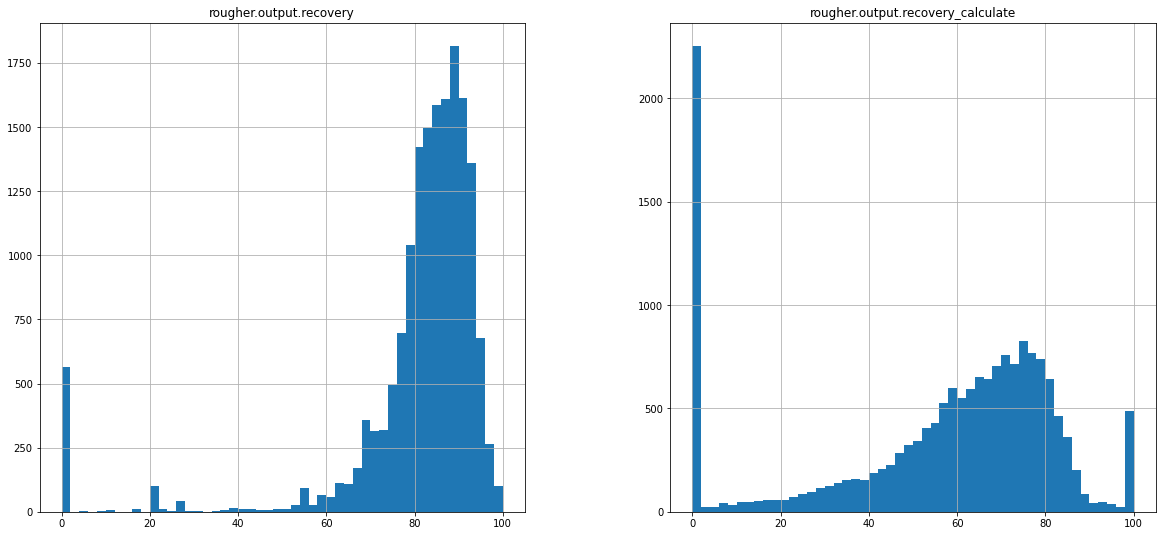

In [26]:
gold_train_2.loc[:,['rougher.output.recovery','rougher.output.recovery_calculate']].hist(bins = 50,figsize=(20, 9) )

<AxesSubplot:>

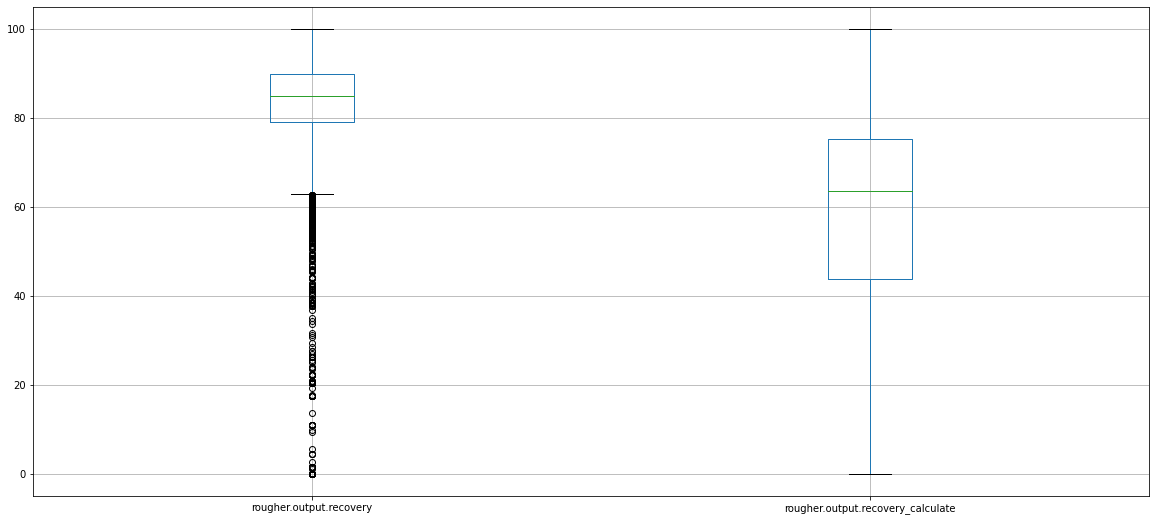

In [27]:
gold_train_2.loc[:,['rougher.output.recovery','rougher.output.recovery_calculate']].boxplot(figsize=(20, 9) )

### **CONCLUSIÓN INTERMEDIA**
Se observa una clara presencia de valores atípicos que deben estar seguramnete distribuidos  a lo largo de todas las características. Esto puede causar problemas a la hora de realizar predicciones. 

Se evidencia como las dictribuciones entre los valores calculados y los reales son parecidos, siendo un 26.62 % mayores en lo que a media se refiere los reales a los teteóricos, sin embargo, las caracteristicas se coportan de manera similar, haciendo alución a que las tendencias son las mismas, y más aún si se elimina la presencia de atípicos, o se determia una mejor manera de tratarlos, solo que al ser valores multivariables, es dificil de determinar sin más información a la mano.

## **PREPROCESAMIENTO Y ANÁLISIS DE DATOS**

En vista de lo evidenciado anterioemnete, se procede a analizar y preprocesar los datos 

Primeramente, se observaran cuales son las columnas objetivo, que no estan presentes en dataframe de prueba, con respecto al de entrenamiento 

In [28]:
targets = list(set(gold_train.columns).difference(set(gold_test.columns)))
targets = sorted(targets)
print('Los objetivos son:')
count=0
for i in targets:
  print(count,i)
  count += 1
  

Los objetivos son:
0 final.output.concentrate_ag
1 final.output.concentrate_au
2 final.output.concentrate_pb
3 final.output.concentrate_sol
4 final.output.recovery
5 final.output.tail_ag
6 final.output.tail_au
7 final.output.tail_pb
8 final.output.tail_sol
9 primary_cleaner.output.concentrate_ag
10 primary_cleaner.output.concentrate_au
11 primary_cleaner.output.concentrate_pb
12 primary_cleaner.output.concentrate_sol
13 primary_cleaner.output.tail_ag
14 primary_cleaner.output.tail_au
15 primary_cleaner.output.tail_pb
16 primary_cleaner.output.tail_sol
17 rougher.calculation.au_pb_ratio
18 rougher.calculation.floatbank10_sulfate_to_au_feed
19 rougher.calculation.floatbank11_sulfate_to_au_feed
20 rougher.calculation.sulfate_to_au_concentrate
21 rougher.output.concentrate_ag
22 rougher.output.concentrate_au
23 rougher.output.concentrate_pb
24 rougher.output.concentrate_sol
25 rougher.output.recovery
26 rougher.output.tail_ag
27 rougher.output.tail_au
28 rougher.output.tail_pb
29 rougher.o

Todos los datos que no estan presnetes en el data frame de prueba, son de tipo `output` es decir, los diferentes resultados que obtengo, luego de cada una de las etápas.

A continuación se procede a anlizar como se distribuyen las concentraciones de la plata, el oro y el plomo en el proceso que realiza la empresa y sus etapas, como la inicial (materia prima), luego de la flotación y la final

In [29]:
gold_train.loc[:,['rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb']]


,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb
0,11.500771,19.793808,7.101074
1,11.615865,20.050975,7.278807
2,11.695753,19.737170,7.216833
3,11.915047,19.320810,7.175616
4,12.411054,19.216101,7.240205
...,...,...,...
16855,11.124896,18.603550,10.984003
16856,11.425983,18.441436,10.888213
16857,8.523497,15.111231,8.955135
16858,11.658799,17.834772,10.655377


Se observa como se distribuyen los datos en la etapa de materia prima, cuando aún el material no ha sido procesado, para la plata, el oro y el plomo tanto en el conjunto de prueba como en el de entrenamiento

In [30]:
gold_train.loc[:,['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb']].describe()

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb
count,16778.000000,16777.000000,16632.000000
mean,7.832347,7.170717,3.218931
std,3.139014,3.002113,1.477263
min,0.000000,0.000000,0.000000
25%,6.889426,6.203083,2.551143
50%,7.938193,7.443530,3.297050
75%,9.829857,8.965193,4.181842
max,14.869652,14.093363,7.142594


In [31]:
gold_test.loc[:,['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb']].describe()

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb
count,5840.000000,5840.000000,5840.000000
mean,8.736170,8.700930,3.552722
std,2.985805,2.803046,1.326113
min,0.000000,0.000000,0.000000
25%,7.598683,7.763634,3.079145
50%,9.628324,9.449623,3.679706
75%,10.568373,10.377337,4.241195
max,14.406130,13.731330,6.905684


Se evidencia como las distribuciones de los datos son bastente similares, y casi no varian los uno de los otros en en esta etapa.

Ahora bien, antes de realizar el modelo de machine learning, es de suma importancia, observar como estan distribuidos los valores en las concentraciones de oro, plata y plomo, para los tres estados antes mecionados, primero para saber como se coportan en cada etapa y segundo para determinar que se debe hacer si hay presencia de atípicos o de ausentes

In [32]:
gold_train.loc[:,['rougher.output.concentrate_ag','rougher.output.concentrate_au','rougher.output.concentrate_pb']].describe()

,rougher.output.concentrate_ag,rougher.output.concentrate_au,rougher.output.concentrate_pb
count,16778.000000,16778.000000,16778.000000
mean,10.580475,17.401541,6.880322
std,4.451490,6.921875,2.928757
min,0.000000,0.000000,0.000000
25%,9.970467,17.443663,6.346373
50%,11.459862,19.644663,7.583773
75%,13.280031,21.224486,8.503498
max,24.480271,28.522811,18.394042


In [33]:
gold_train.loc[:,['rougher.input.feed_ag','rougher.input.feed_au','rougher.input.feed_pb']].describe()

,rougher.input.feed_ag,rougher.input.feed_au,rougher.input.feed_pb
count,16778.000000,16777.000000,16632.000000
mean,7.832347,7.170717,3.218931
std,3.139014,3.002113,1.477263
min,0.000000,0.000000,0.000000
25%,6.889426,6.203083,2.551143
50%,7.938193,7.443530,3.297050
75%,9.829857,8.965193,4.181842
max,14.869652,14.093363,7.142594


In [34]:
gold_train.loc[:,['final.output.concentrate_ag','final.output.concentrate_au','final.output.concentrate_pb']].describe()

,final.output.concentrate_ag,final.output.concentrate_au,final.output.concentrate_pb
count,16788.000000,16789.000000,16788.000000
mean,4.716907,39.467217,9.113559
std,2.096718,13.917227,3.389495
min,0.000000,0.000000,0.000000
25%,3.971262,42.055722,8.825748
50%,4.869346,44.498874,10.065316
75%,5.821176,45.976222,11.054809
max,16.001945,53.611374,17.031899


Las distribuciones anteriores ahora se muetsran e gráficas para visualizar de mejor manera

Primeramente se estudian las tres etapas de la plata

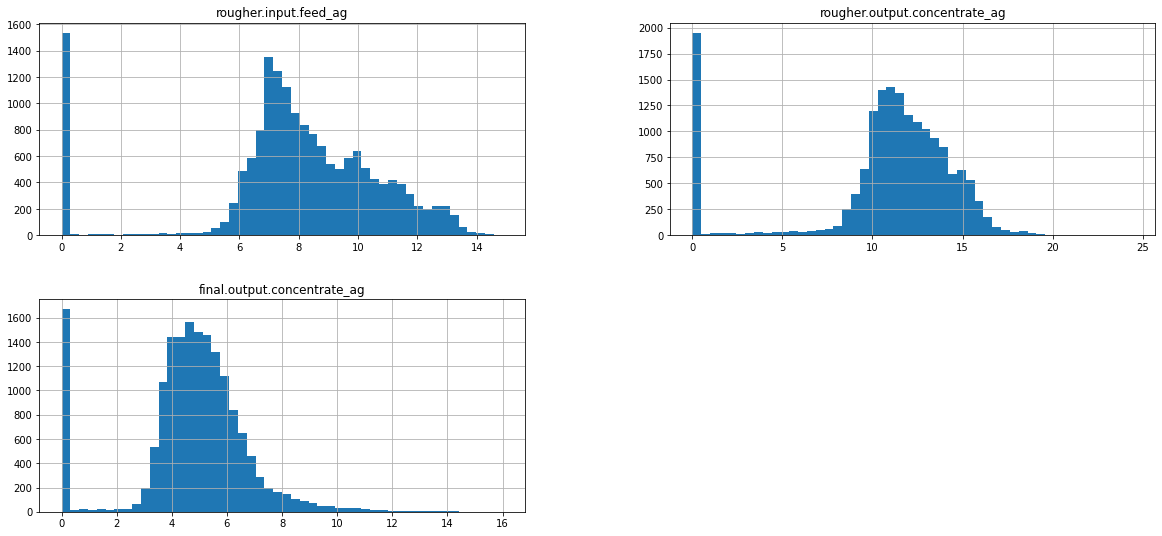

In [35]:
gold_train.loc[:,['rougher.input.feed_ag','rougher.output.concentrate_ag','final.output.concentrate_ag']].hist(bins = 50, figsize = (20,9))
plt.show()

Como se puede observar, luego de la etapa de flotación hubo un leve incremento de la concentración de plata, sin embargo, al final, la concentración de la misma descendió por debajo de la concentración inicial, se sigue apreciando la gran distribución de valores en torno al 0

Continuando con el nálisis del oro

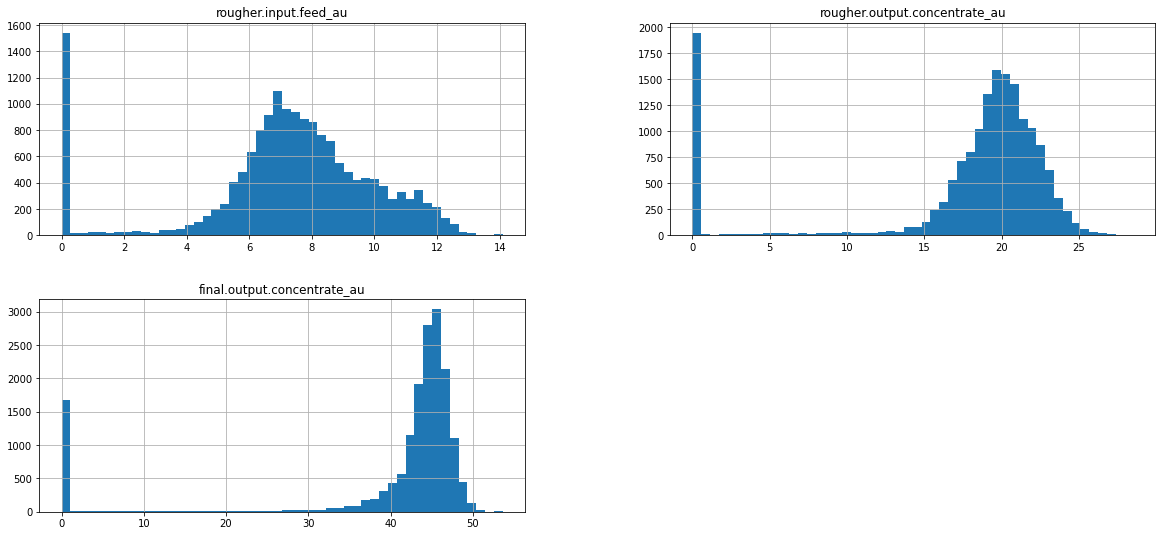

In [36]:
gold_train.loc[:,['rougher.input.feed_au','rougher.output.concentrate_au','final.output.concentrate_au']].hist(bins = 50, figsize = (20,9))
plt.show()

Se evidencia un incremento substancial de la concentración de oro luego del proceso de flotación y los dos filtrados, practicamente multiplicando por 4 la concentración inicial.

Continuando con la disposición  del plomo

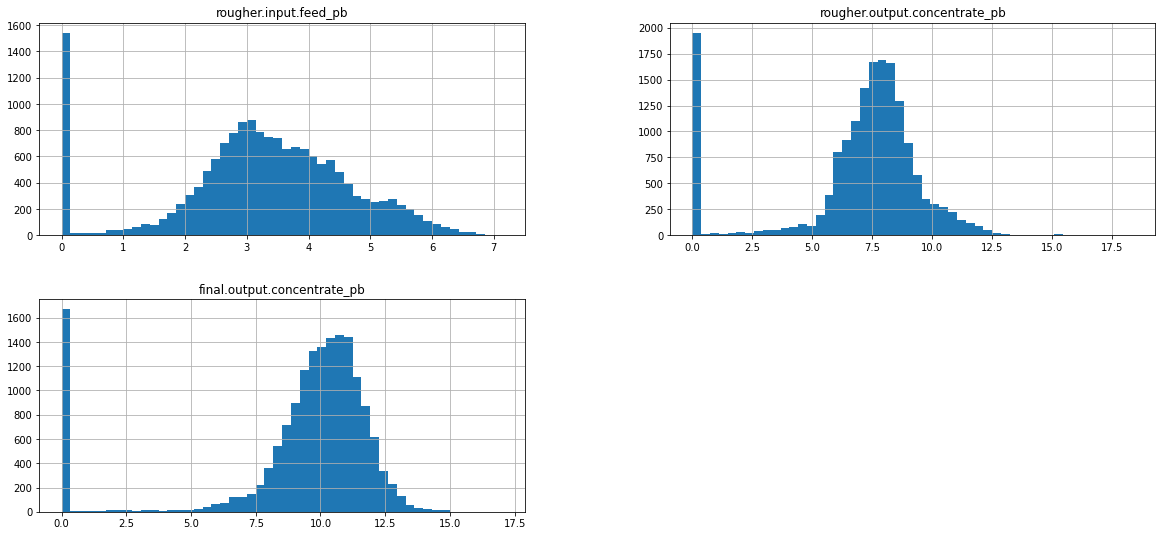

In [37]:
gold_train.loc[:,['rougher.input.feed_pb','rougher.output.concentrate_pb','final.output.concentrate_pb']].hist(bins = 50, figsize = (20,9))
plt.show()

Se evidencia como también hubo un incremento de las cocentraciones de plomo luego de realizar el proceso de tratado de metales pesado, sin embargo, no tan efectiva como en el caso del oro.

### **CONCLUSIÓN INTERMEDIA**

Se logró en esta etapa observar como cambian las distribuciones de los diferentes elementos dentro del proceso, viendo como al final las conentraciones de oro y plomo aumentaron considerablemente, y las de plata se vieron reducidas.


## **MODELO DE MACHINE LEARNING**

La empresa Zyfra desea poder determinar por medio de un algoritmo de machine learning cuales van a ser las dispociones de oro luego de la fase de flotación y al finalizar el proceso. para ello se debe de calcular el error medio absoluto porcentual simétrico o sMAPE. para ello se crea la función a continuación

In [38]:
def smape(target,predict):
  num = (target - predict).abs()
  den = (target.abs() + predict.abs())/2
  return(num / den).mean()


In [39]:
def smape_final(target,predict):
  smepe1 = smape(target[0],predict[0])
  smepe2 = smape(target[1],predict[1])
  return 0.25*smepe1 + 0.75*smepe2

Se procede a realizar 2 modelos, el primero de ellos por medio de arboles de decisión, y el segundo de bosque aleatorio, para poder determianr cual de los dos arroja un mejor modelo y permite un error medio absoluto porcentual simétrico más cercano a 0

La siguinete función permite realizar el calculo de la regresión lineal simple, realizar el conrrespondiente escalado de los valores de las características y así evitar predicciones erroneas.

Así mismo, la función arroja el error cuadratico medio el sMAPE y se valida por medio de una validación cruzada, las cuales imprime al finalizar, para poder comparar los modelos y su exactitud

Se sustituyen los atípicos por medio de una distribución uniforme empleando el método `ffill()` y se eleimina la columna `'date'` ya que la misma no aporta a la regresión

In [40]:
for i in range(gold_train.shape[1]):
  gold_train.iloc[:,i] = gold_train.iloc[:,i].ffill()

gold_train = gold_train.drop('date', axis = 1)
gold_test = gold_test.drop('date', axis = 1)


### **ARBOL DE DECISIÓN REGRESOR**

Se crea la función para el realizar el cálculo del arbol de desición regresor, se emplean los mismos parámetros del caso anterior.

In [41]:
def Decision_Tree_Regressor(df, colum_to_predict):
 
  features = df[gold_test.columns].reset_index(drop=True)
  target = df[colum_to_predict]
  target.columns = [0,1]
  kf = KFold(n_splits=5)
  smape = 100
  best_model = None
  scores = []
  for d in [15,16,17,18,19,20]:
    for splitter in [2,4,6,8,10]:
      model = DecisionTreeRegressor(max_depth = d, min_samples_split = splitter, random_state=42)
      score = []
      for fold,(train_idx, val_idx) in enumerate(kf.split(features), start = 1):
        X_train = features.loc[train_idx].reset_index(drop = True)
        y_train = target.loc[train_idx].reset_index(drop = True) 
        X_val = features.loc[val_idx].reset_index(drop = True)
        y_val = target.loc[val_idx].reset_index(drop = True)  

        model.fit(X_train,y_train)  
        y_pred = pd.DataFrame(model.predict(X_val))
        score.append(smape_final(y_val, y_pred))
        
        print(f"Score for fold {fold}: {smape_final(y_val, y_pred)}")
      if np.mean(score) < smape:
        smape = np.mean(score)
        best_model = model                    
      
      print(f'La media de los valores es: {np.mean(score)}\n')
      score = []
    scores.append(score)
  print(f'El mejor sMAPE es: {smape}')
  return best_model

In [ ]:
best_model_1 = Decision_Tree_Regressor(gold_train,['rougher.output.recovery','final.output.recovery'])

Score for fold 1: 0.25544162049263175
Score for fold 2: 0.30229010046564736
Score for fold 3: 0.1989463690617131
Score for fold 4: 0.24827761372488824
Score for fold 5: 0.20065062842533393
La media de los valores es: 0.24112126643404289

Score for fold 1: 0.27211388775474554
Score for fold 2: 0.1917996211890219
Score for fold 3: 0.18174058043702723
Score for fold 4: 0.2522771328115618
Score for fold 5: 0.20443589589457134
La media de los valores es: 0.2204734236173856

Score for fold 1: 0.2544713459717908
Score for fold 2: 0.2621664354804128
Score for fold 3: 0.17887946477932212
Score for fold 4: 0.2537938561443998
Score for fold 5: 0.20093452310813067
La media de los valores es: 0.23004912509681125

Score for fold 1: 0.2513406230031812
Score for fold 2: 0.27625968324272676
Score for fold 3: 0.18567994609150634
Score for fold 4: 0.2553961478349704
Score for fold 5: 0.20449874115696043
La media de los valores es: 0.23463502826586904

Score for fold 1: 0.2701947289537792
Score for fold 2

Por último se realiza el cálculo del error medio absoluto porcentual simétrico final, según la formula proporcionada por la empresa, donde se evidencia un valor de 8.89 % indicando que el modelo tiene un margen de error porcentual bastante bajo, lo que habla muy bien de este para poder predecir como lo requiere la empresa

In [ ]:
def Random_Tree_Regressor(df, colum_to_predict):

  features = df[gold_test.columns].reset_index(drop=True)
  target = df[colum_to_predict]
  target.columns = [0,1]
  kf = KFold(n_splits=5)
  smape = 100
  best_model = None
  scores = []
  for d in [6,7]:
    for splitter in [8,10]:
      model = RandomForestRegressor(max_depth = d, min_samples_split = splitter, random_state=42)
      score = []
      for fold,(train_idx, val_idx) in enumerate(kf.split(features), start = 1):
        X_train = features.loc[train_idx].reset_index(drop = True)
        y_train = target.loc[train_idx].reset_index(drop = True) 
        X_val = features.loc[val_idx].reset_index(drop = True)
        y_val = target.loc[val_idx].reset_index(drop = True)  

        model.fit(X_train,y_train)  
        y_pred = pd.DataFrame(model.predict(X_val))
        score.append(smape_final(y_val, y_pred))
        
        print(f"Score for fold {fold}: {smape_final(y_val, y_pred)}")
      if np.mean(score) < smape:
        smape = np.mean(score)
        best_model = model                    
      
      print(f'La media de los valores es: {np.mean(score)}\n')
      score.append(smape_final(y_val, y_pred))
      score = []
    scores.append(score)
  print(f'El mejor sMAPE es: {smape}')
  return best_model

In [ ]:
best_model_2 = Random_Tree_Regressor(gold_train, ['rougher.output.recovery','final.output.recovery'])

Se procede a verificar con el conjunto de prueba

In [ ]:
y_test = gold_full.loc[gold_test.index,  ["rougher.output.recovery", "final.output.recovery"]].reset_index(drop=True)
y_test.columns = [0,1]


In [ ]:
gold_test = gold_test.ffill()
y_predict = best_model_2.predict(gold_test)
y_predict = pd.DataFrame(y_predict)
smape_final(y_test,y_predict)

Como se observa, con el conjuto de prueba, obtuvimos un sMAPE_final del 13.48 % siendo un error bastante bajo y aceptable para el modelo en cuestión

### **CONCLUSIÓN INTERMEDIA**

Se ópta por utilizar el modelo de arbol de desición aleatorio, ya que mismo proporciona una mayor confiabilidad de los valores para la empresa, además de un margen de error mucho menor, grarantizando un mejor funcionamineto con un 14.78%

Así mismo, con el conjunto de prueba, se obtuvo un valor de sMAPE_final = 13.48% pudiendo concluir que es un buen modelo para predecir los valores 

## **CONCLUSIÓN DEL PROYECTO** 

En el presente proyecto se requería que la empresa Zyfra fuese capaz de predecir cuales serían las concentraciones finales del oro en su proceso de recuperación de metales pesados.

Se observa una clara presencia de valores atípicos que deben estar seguramnete distribuidos  a lo largo de todas las características. Esto podía causar problemas a la hora de realizar predicciones.

Se evidenció como las dictribuciones entre los valores calculados y los reales son parecidos, siendo un 26.62 % mayores en lo que a media se refiere los reales a los teteóricos, sin embargo, las caracteristicas se coportaban de manera similar, haciendo alusión a que las tendencias son las mismas.

Se logró observar como cambian las distribuciones de los diferentes elementos dentro del procesos, viendo como al final las concentraciones de oro y plomo aumentaron considerablemente, y las de plata se vieron reducidas.

Se ópta por utilizar el modelo de arbol de decisión regresor, ya que mismo proporciona una mayor confiabilidad de los valores para la empresa, además de un margen de rror mucho menor, grarantizando un mejor funcionamineto.

Se logra obtener un modleo de machine learning que tiene un error medio absoluto porcentual simétrico final del 14.78% garantizando una buena eficiencia del mismo.

Así mismo, con el conjunto de prueba, se obtuvo un valor de sMAPE_final = 13.48% pudiendo concluir que es un buen modelo para predecir los valores 